# Example 2: Virtual Community 

Example 2 shows how **pyrecodes** can be used to assess the resilience of interdependent infrastructure systems and housing in a virtual community. This is a toy example to illustrate how the system recovery and interdependencies are captured in iRe-CoDeS.

![VirtualCommunity](./Example%202/Example_2_Community.png)

## Input data

Three files are needed to construct the model:
- **Component library** file: input file defining the blueprints for system’s components.
- **System Configuration** file: input file defining the spatial and temporal discretization of the system, component locations, considered resources and resilience calculators.
- **main** file: input file defining the classes and path to files of the component library and the system.

In this Example, these files are in a JSON format.

In [1]:
from pyrecodes import main
from importlib import reload

def set_repair_durations_to_mimic_the_paper_case_study(system):
    system.damage_input.get_initial_damage()
    damage_input = system.damage_input.damage_levels
    for damage_level, component in zip(damage_input, system.components):
        initial_repair_rate = 1 / component.recovery_model.recovery_activities['Repair'].duration
        duration = damage_level/initial_repair_rate
        if duration > 0:
            component.recovery_model.recovery_activities['Repair'].set_duration({'Deterministic': {'Value': duration}})

main_dict = main.read_file('./Example 2/VirtualCommunity_Main.json')
system = main.create_system(main_dict)
set_repair_durations_to_mimic_the_paper_case_study(system)
system.start_resilience_assessment()
system.calculate_resilience()


/Users/nikola/pyrecodes/pyrecodes/ResilienceCalculator.py:72: RuntimeWarning: invalid value encountered in scalar divide
  resilience_goal['GoalMet'].append(resilience_goal['DesiredFunctionalityLevel'] < total_consumption/total_demand)


Resilience assessment finished.


[{'ElectricPower': 451.04600000000005,
  'CoolingWater': 1.9398000000000002,
  'LowLevelCommunication': 11532.302777539478,
  'HighLevelCommunication': 2074.9999999999986,
  'PotableWater': 20.53652,
  'Shelter': 28931.999999999975},
 [{'Resource': 'ElectricPower',
   'Scope': 'All',
   'DesiredFunctionalityLevel': 0.95,
   'MetAtTimeStep': 10},
  {'Resource': 'CoolingWater',
   'Scope': 'All',
   'DesiredFunctionalityLevel': 0.9,
   'MetAtTimeStep': 13},
  {'Resource': 'HighLevelCommunication',
   'Scope': 'All',
   'DesiredFunctionalityLevel': 0.9,
   'MetAtTimeStep': 26},
  {'Resource': 'LowLevelCommunication',
   'Scope': 'All',
   'DesiredFunctionalityLevel': 0.8,
   'MetAtTimeStep': 16},
  {'Resource': 'Shelter',
   'Scope': 'All',
   'DesiredFunctionalityLevel': 0.9,
   'MetAtTimeStep': 34}]]

In [3]:
from pyrecodes import main
system = main.run('./Example 2/VirtualCommunity_Main.json')

/Users/nikola/pyrecodes/pyrecodes/ResilienceCalculator.py:77: RuntimeWarning: invalid value encountered in scalar divide
  resilience_goal['GoalMet'].append(resilience_goal['DesiredFunctionalityLevel'] < total_consumption/total_demand)


Resilience assessment finished.


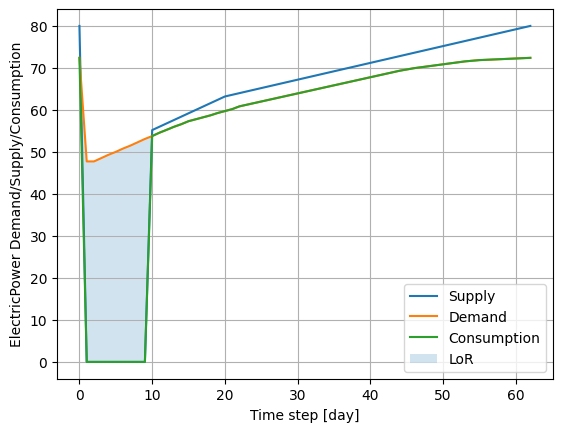

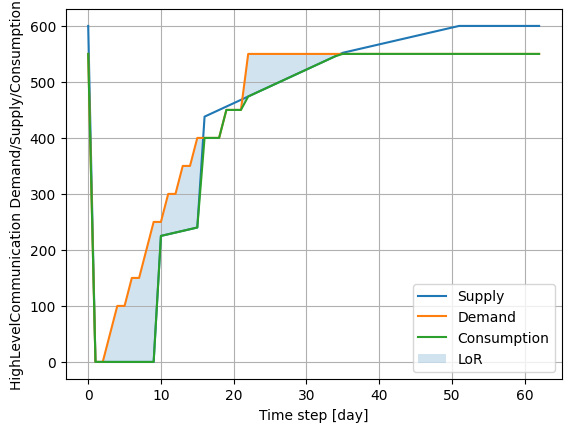

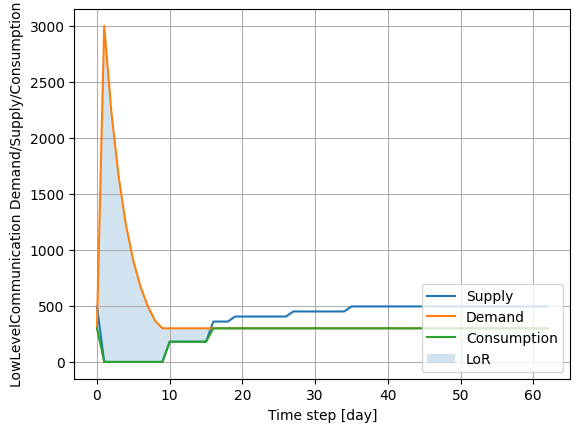

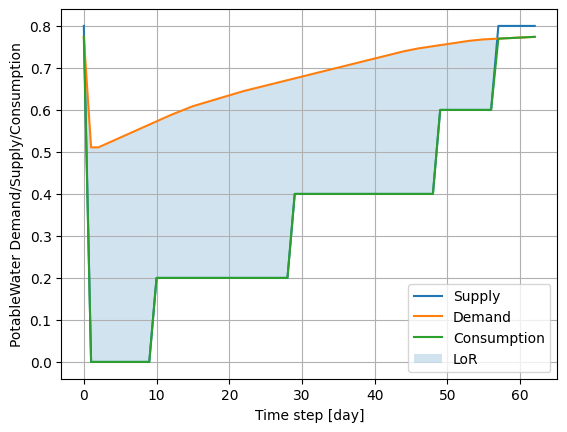

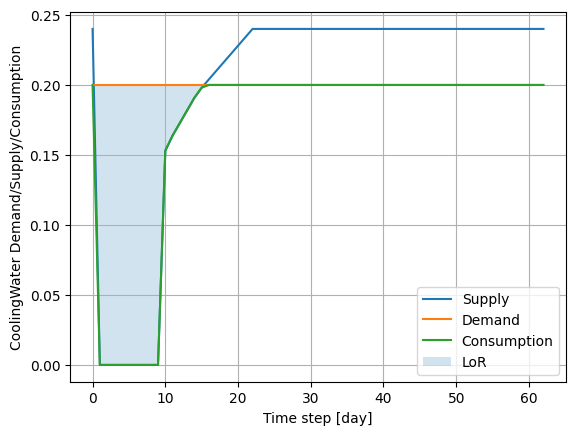

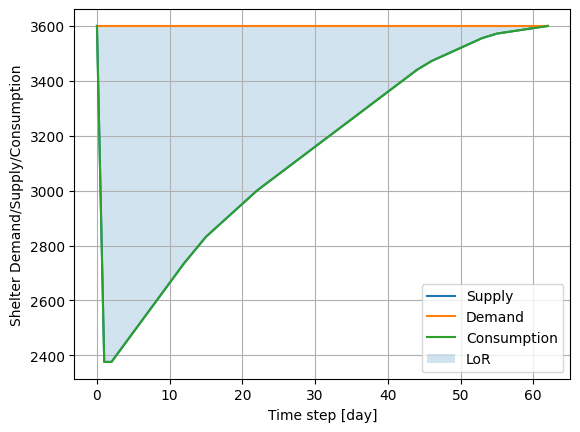

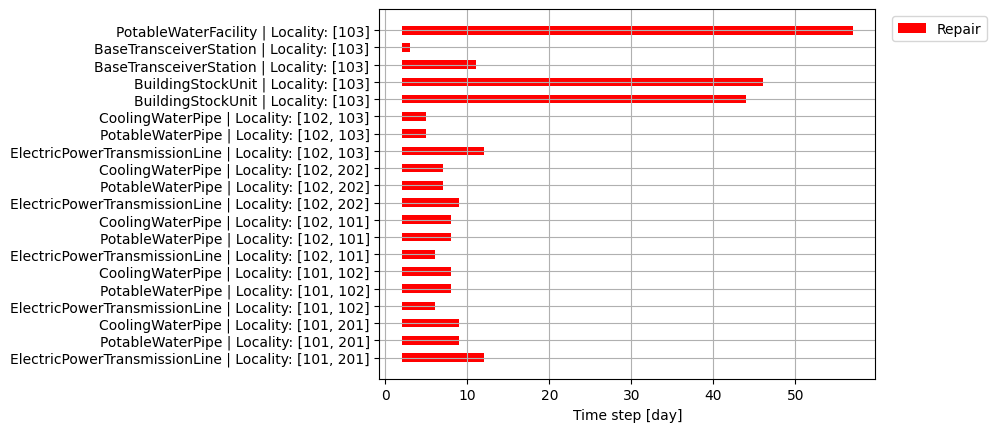

In [2]:
from pyrecodes import Plotter

plotter_object = Plotter.Plotter()
x_axis_label = 'Time step [day]'
resource_names = ['ElectricPower', 'HighLevelCommunication', 'LowLevelCommunication',  'PotableWater',  'CoolingWater', 'Shelter']
for resource_name in resource_names:
    y_axis_label = f'{resource_name} Demand/Supply/Consumption'
    axis_object = plotter_object.setup_lor_plot_fig(x_axis_label, y_axis_label)
    plotter_object.plot_single_resource(list(range(system.START_TIME_STEP, system.time_step+1)), system.resilience_calculators[0].system_supply[resource_name], 
                                        system.resilience_calculators[0].system_demand[resource_name], 
                                        system.resilience_calculators[0].system_consumption[resource_name], axis_object)

axis_object = plotter_object.setup_gantt_chart_fig(x_axis_label, system.components)
plotter_object.plot_gantt_chart(system.components[:20], axis_object)